In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [5]:
job_title = 'Data Analyst'
df_da = df[df['job_title_short']==job_title].copy()
df_da['month_no'] = df['job_posted_date'].dt.month
df_da_ex = df_da.explode('job_skills')
df_da_pivot = df_da_ex.pivot_table(index='month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_ind = df_da_pivot.loc['Total'].sort_values(ascending=False).index
df_da_pivot = df_da_pivot[df_ind]
df_da_pivot = df_da_pivot.drop('Total') 


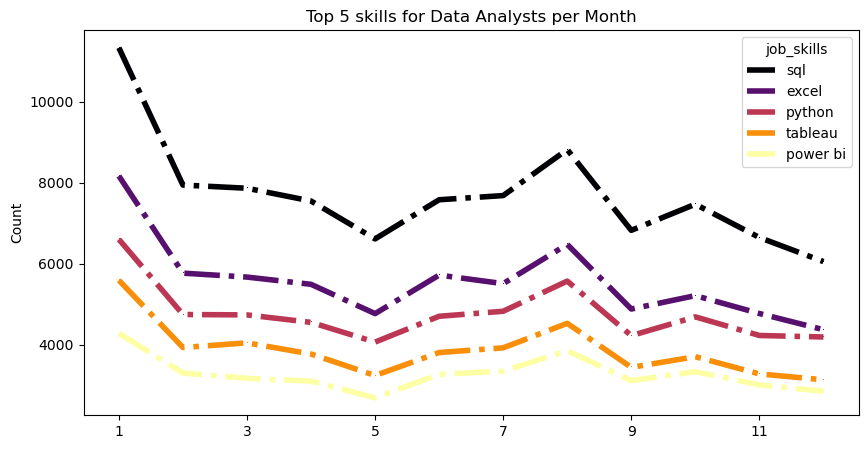

In [19]:
df_da_pivot.iloc[:,:5].plot(kind='line',
                            linewidth = 4,
                            linestyle = '-.',
                            colormap = 'inferno',
                            marker=',',
                            markersize=15,
                             figsize=(10,5) )
plt.title('Top 5 skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()